In [75]:
#!pip install pyAudioAnalysis -- not used
#!pip install pydub
#!pip install librosa
#!pip install sox

In [10]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [11]:
curr_dir = os.getcwd()
export_path = os.path.join(curr_dir,"output")
task_1_path = os.path.join(curr_dir, "Task_1")
task_2_path = os.path.join(curr_dir, "Task_2")
task_3_path = os.path.join(curr_dir, "Task_3")

## Task 1: Reversing and Speeding up an Audio
As a warm-up task, participants are given an audio clip that obviously (i) has been slowed down and (ii) is playing backwards.
To reverse and speed up the clip, participants can use native reverse and speed-up functions native to most audio processing libraries.

Question: Find a place or location

In [9]:
#Open a wave file
#https://github.com/jiaaro/pydub
from pydub import AudioSegment

In [10]:
#Required
#brew install ffmpeg
task_1_audio_path = os.path.join(task_1_path,os.listdir(task_1_path)[0])
task_1 = AudioSegment.from_wav(task_1_audio_path)
reversed_audio = task_1.reverse()
speedup_audio = reversed_audio.speedup(playback_speed=3)
task_1_output_path = os.path.join(export_path, "Task1_speeup_reversed.wav")

In [11]:
speedup_audio

In [23]:
speedup_audio.export(task_1_output_path, format="wav", tags={'comments': 'Reversed and sped up 3 times'})

<_io.BufferedRandom name='/Users/gjj980/Desktop/Work/TECH Notes Pending compilations/Data Science and AI/CSIT Audio/output/Task1_speeup_reversed.wav'>

#### Optional
#### 1. Extra: Speech to Text 
#### 2. Extra2: Identify Place or Location

## Task 2: Viewing Audio in the Frequency Domain
Participants will note a screeching / chirp-like sound in the Christmas tunes provided, where upon they are hinted to explore different ways to visualise audio data.

Question: Find a time

### Alternatives...scipy signal, Pytorch audio

In [34]:
#Required brew install sox
import librosa
import librosa.display
import sox

What is a Spectrogram?
- A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform

- Spectrograms are basically two-dimensional graphs, with a third dimension represented by colors. 
- Time runs from left (oldest) to right (youngest) along the horizontal axis. Each of our volcano and earthquake sub-groups of spectrograms shows 10 minutes of data with the tic marks along the horizontal axis corresponding to 1-minute intervals. 
- Vertical axis represents frequency, which can also be thought of as pitch or tone, with the lowest frequencies at the bottom and the highest frequencies at the top
-  The amplitude (or energy or “loudness”) of a particular frequency at a particular time is represented by the third dimension, color, with dark blues corresponding to low amplitudes and brighter colors up through red corresponding to progressively stronger (or louder) amplitudes.

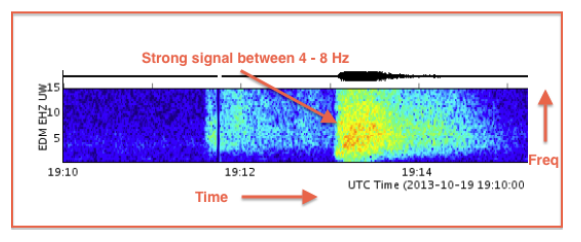

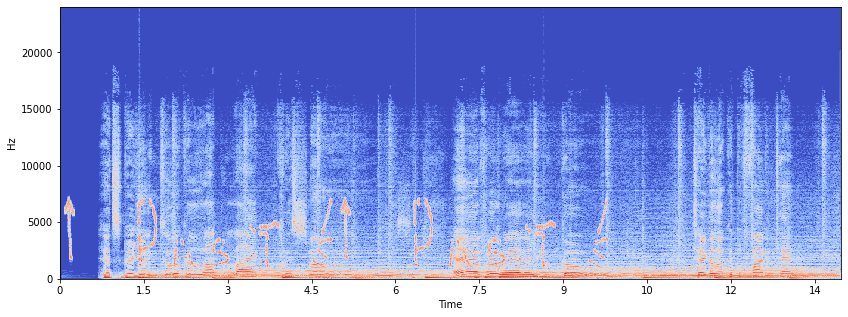

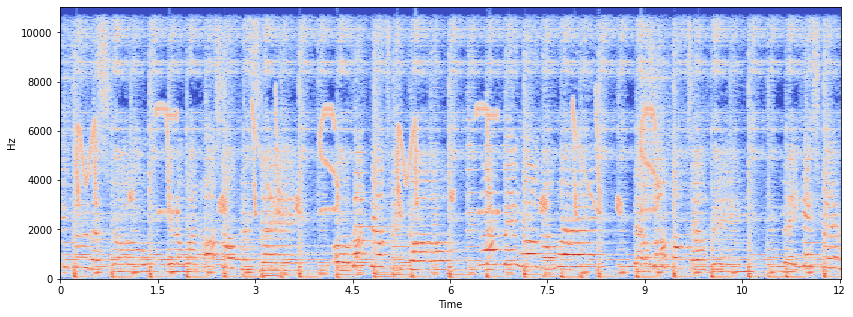

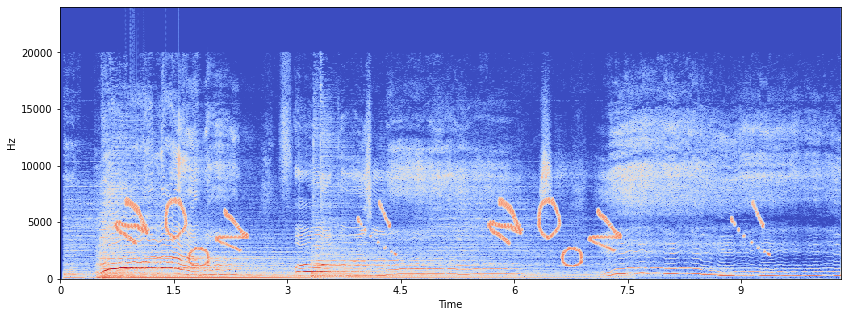

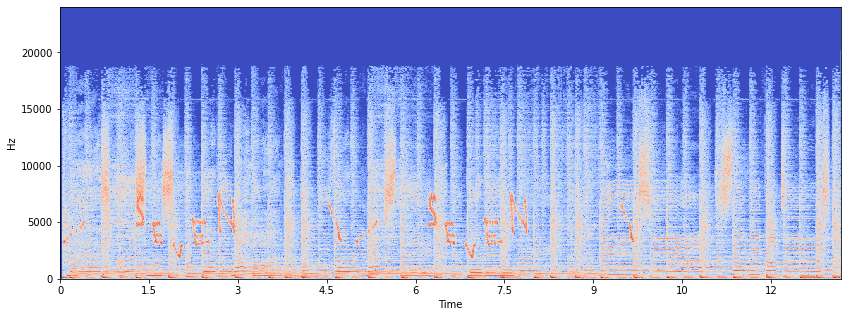

In [13]:
def spectrum_viewer(file_path):
    # Extract sampling rate from audio
    sampling_rate = sox.file_info.sample_rate(file_path)
    # Extract data array from audio clip
    x, _ = librosa.load(file_path, sr=sampling_rate) 
    #Sampling rate is number of samples of audio carried per second
    # Perform Short Time Fourier Transform on audio array
    # Compute discrete Fourier transforms (DFT) over short overlapping windows
    X = librosa.stft(x)
    # Convert real spectrum magnitude to db
    Xdb = librosa.amplitude_to_db(abs(X))
    # Display Spectrum
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
    plt.show()

task_2_audio_lst = []
for task_2_audio_path in os.listdir(task_2_path):
    if ".wav" in task_2_audio_path:
        spectrum_viewer(os.path.join(task_2_path,task_2_audio_path))    

### Alternative using soundfile and scipy.signal

In [17]:
import soundfile as sf
from scipy.signal import stft

def spectrum_viewer(file_path):
    # Load audio file using soundfile
    x, sampling_rate = sf.read(file_path)
    
    # If stereo, convert to mono by averaging the channels
    if x.ndim == 2:
        x = x.mean(axis=1)
    
    # Perform Short Time Fourier Transform using scipy
    f, t, Zxx = stft(x, fs=sampling_rate, nperseg=1024, noverlap=512)
    
    # Convert the amplitude to decibels
    Zxx_db = 20 * np.log10(np.abs(Zxx) + 1e-6)  # Adding a small value to avoid log(0)
    
    # Display Spectrum
    plt.figure(figsize=(14, 5))
    plt.pcolormesh(t, f, Zxx_db, shading='gouraud')
    plt.title('Spectrogram')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(label='Magnitude [dB]')
    plt.show()

#### Comment out to run
#task_2_audio_lst = []
#for task_2_audio_path in os.listdir(task_2_path):
#    if ".wav" in task_2_audio_path:
#        spectrum_viewer(os.path.join(task_2_path,task_2_audio_path))  

In [79]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.io import wavfile

# def forier_audio_visualisation(audio_path):
#     audio_segment = AudioSegment.from_wav(audio_path)
#     samples = np.array(audio_segment.get_array_of_samples())
#     if audio_segment.channels == 2:
#         samples = samples[::2]
#     frequencies = np.fft.rfftfreq(len(samples), 1 / audio_segment.frame_rate)
#     magnitudes = np.abs(np.fft.rfft(samples))
#     return [frequencies,magnitudes]

# colors = ['blue', 'red' ,'green', 'black']
# freq_mag_dict = {}
# for index  in range(len(task_2_audio_lst)):
#     freq_mag_dict[colors[index]] = forier_audio_visualisation(task_2_audio_lst[index])
    
# plt.figure(figsize=(12, 10))
# for color, freq_mag in freq_mag_dict.items():
#     freq, mag = freq_mag
#     plt.plot(freq, mag, color=color, label='Audio 1')
    
# plt.title('Frequency Spectrum of Audios')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Magnitude')
# plt.grid(True)
# plt.legend()
# plt.show()

## Task 3: Band Filter with Fourier Transform
Participants will note a very noisy clip with a slight murmuring (in a foreign language) in the background.
If participants were to feed the audio clip directly into a multi-language speech-to-text model, they will obtain the following text (which makes no sense at all).

Question: Find a song

In [29]:
import torchaudio
from transformers import Wav2Vec2ForCTC, Wav2Vec2Tokenizer
import torch
import whisper

task_3_audio_path = os.path.join(task_3_path,os.listdir(task_3_path)[0])

##### NOTE: Loading Whisper causes memory issues on Mac - Refer to CSIT_Task3.ipynb or run on CUDA Windows PC

In [30]:
#!pip install git+https://github.com/openai/whisper.git 

#NOTE: Loading Whisper causes memory issues on Mac
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
# model = whisper.load_model("large-v2").to(device)
# result = model.transcribe(task_3_audio_path, language = "turkish") 
# print(result["text"])

/Users/gjj980/miniforge3/lib/python3.9/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


In [32]:
# result = model.transcribe(task_3_audio_path, language = "turkish", task = "translate")
# print(result["text"])

Other STT pre-trained model
- Wav2Vec 2.0 https://github.com/facebookresearch/fairseq/tree/main/examples/wav2vec#wav2vec-20 (some bugs relating to sampling rate refer to https://python-soundfile.readthedocs.io/en/0.11.0/#soundfile.read)
- Kaldi (Havent tried)

##### As seen in the notebook, the audio transcribed into English is gibberish... as such Fast Fourier Transform (FTT)

SFT
https://manual.dewesoft.com/x/setupmodule/modules/general/math/freqdomainanalysis/stft#:~:text=If%20you%20look%20closely%2C%20there,taken%20for%20the%20calculating%20FFT.

FFT
https://manual.dewesoft.com/x/setupmodule/modules/general/math/freqdomainanalysis/fft

In [49]:
from scipy.fft import rfft, rfftfreq, irfft
import soundfile

#Perform FTT
voice_data, sampling_rate_voice = librosa.load(task_3_audio_path)

In [40]:
#Number of samples
N = len(voice_data)
print(N)

192560


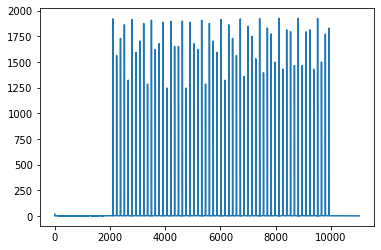

In [43]:
# Apply real fourier transform
yf = rfft(voice_data)
xf = rfftfreq(N, 1/ sampling_rate_voice)
# Show spectrogram plot
plt.plot(xf, np.abs(yf)) 
plt.show()

#### From Nyquist theorem, periodic signal must be sampled at more than twice the highest frequency component of the signal

- Calculating the size of each frequency bin
- Discard all audio below 30Hz and above 2kHz

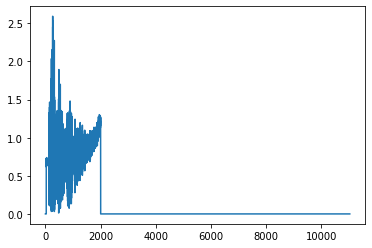

In [45]:
points_per_freq = len(xf) / (sampling_rate_voice / 2)
target_idx = int(points_per_freq * 2000) #2000hz

#Remvoe anything under 30hz and beyong 2000hz
yf[target_idx - 1 :] = 0 

yf[:int(points_per_freq * 30)] = 0
plt.plot(xf, np.abs(yf)) 
plt.show()

##### Conduct inverse Fourier Transform + Normalisation

In [52]:
filtered_voice_sig = irfft(yf)

#Normalisation
norm_filtered_voice_sig = np.int16(filtered_voice_sig / np.max(np.abs(filtered_voice_sig)) * 32767)

In [53]:
task_3_output_path = os.path.join(export_path, "C.ftt_cleaned.wav")
soundfile.write(task_3_output_path, norm_filtered_voice_sig, samplerate = sampling_rate_voice)